## Posts from official Facebook accounts of the candidates for the US presidential election in 2020
(Date: 10.04.2021)
## ***Joe Biden***
https://www.facebook.com/joebiden  
<span style='background:Blue'>9 055 785 users FB likes the profile</span>  
<span style='background:Blue'>10 942 349 FB users are watching the profile</span>  
## ***Donald Trump*** 
https://www.facebook.com/DonaldTrump  
<span style='background:Red'>32 894 155 users FB likes the profile</span>  
<span style='background:Red'>35 240 449 FB users are watching the profile</span>  

## Import the libraries

In [1]:
import pandas as pd
import numpy as np
import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from textblob import TextBlob
from textblob import Word

from operator import itemgetter

### Functions and constans

In [2]:
stop_words = stopwords.words('english')
len(stop_words)

179

In [3]:
stop_words.extend(['pm','com', 'theblaze','jr','link','https','rsvp','iwillvote','trump'])

In [4]:
len(stop_words)

188

In [5]:
porter_stremmer = PorterStemmer()

def no_tags(s, stem=False, lemmatize=False):
    s = re.sub("#(\w+)", "", s)
    s = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', s)
    s = re.sub("[^a-zA-Z]", " ", s)
    s = s.lower()
    s = word_tokenize(s) 
    clear_post = []
    for word in s:
        if (not word in stop_words) and (len(word)>2):
            if stem:
                clear_post.append(porter_stremmer.stem(word))
            elif lemmatize:
                clear_post.append(Word(word).lemmatize())
            else:
                clear_post.append(word)
    
    return clear_post

## Loading data

In [7]:
trump_df = pd.read_csv('data/FB_Trump.csv', encoding='ansi')
biden_df = pd.read_csv('data/FB_Biden.csv', encoding='ansi')

## Preparing data

In [8]:
trump_df.datetime = pd.to_datetime(trump_df.datetime)
biden_df.datetime = pd.to_datetime(biden_df.datetime)

In [9]:
trump_df.dropna(inplace=True)
trump_df = trump_df[(trump_df.datetime.dt.year>2019)&(trump_df.datetime.dt.year<2021)]
trump_df.reset_index(inplace=True)
trump_df.sort_values(by='likes')
trump_df.tail(3)

,index,datetime,text,likes
1535,1666,2020-02-16 19:24:49,POLITICO.COM\r\nTrump drives massive turnout i...,22985
1536,1667,2020-02-16 16:34:09,Ivanka Trump is in Abu Dhabi ahead of the two-...,51508
1537,1668,2020-02-14 21:56:09,Thank you to the beautiful country of Cambodia...,94399


In [10]:
biden_df.dropna(inplace=True)
biden_df = biden_df[(biden_df.datetime.dt.year>2019)&(biden_df.datetime.dt.year<2021)]
biden_df.reset_index(inplace=True)
biden_df.sort_values(by='likes')
biden_df.tail(3)

,index,datetime,text,likes
1707,1838,2020-01-02 02:05:38,This election is about the soul of our nation ...,5170
1708,1839,2020-01-02 00:51:56,With just over one month until the Iowa Caucus...,840
1709,1840,2020-01-01 02:30:36,Our final fundraising deadline of 2019 is just...,323


In [11]:
trump_df['postNew'] = trump_df.text.apply(lambda x: no_tags(x))
biden_df['postNew'] = biden_df.text.apply(lambda x: no_tags(x))
# lemmatize
trump_df['lemat'] = trump_df.text.apply(lambda x: no_tags(x,stem=False,lemmatize=True))
biden_df['lemat'] = biden_df.text.apply(lambda x: no_tags(x,stem=False,lemmatize=True))
# stemming
trump_df['stem'] = trump_df.text.apply(lambda x: no_tags(x,stem=True,lemmatize=False))
biden_df['stem'] = biden_df.text.apply(lambda x: no_tags(x,stem=True,lemmatize=False))

In [12]:
trump_df.head(3)

,index,datetime,text,likes,postNew,lemat,stem
0,67,2020-12-31 20:28:30,"The Trump White House Archived\r\nDecember 31,...",207708,"[white, house, archived, december, happy, new,...","[white, house, archived, december, happy, new,...","[white, hous, archiv, decemb, happi, new, year..."
1,69,2020-12-31 02:26:20,Donald Trump Jr. tagged a product from their s...,58766,"[donald, tagged, product, shop, december, guys...","[donald, tagged, product, shop, december, guy,...","[donald, tag, product, shop, decemb, guy, urge..."
2,70,2020-12-31 02:15:06,"THEBLAZE.COM\r\nLevin: On January 6, we learn ...",177967,"[levin, january, learn, whether, constitution,...","[levin, january, learn, whether, constitution,...","[levin, januari, learn, whether, constitut, hold]"


In [13]:
biden_df.head(3)

,index,datetime,text,likes,postNew,lemat,stem
0,91,2020-12-31 22:50:38,We have less than one week to do everything in...,16095,"[less, one, week, everything, power, help, jon...","[le, one, week, everything, power, help, jon, ...","[less, one, week, everyth, power, help, jon, o..."
1,92,2020-12-31 20:02:44,Georgia — Today is your last chance to vote ea...,21176,"[georgia, today, last, chance, vote, early, ah...","[georgia, today, last, chance, vote, early, ah...","[georgia, today, last, chanc, vote, earli, ahe..."
2,93,2020-12-31 02:29:10,The next few weeks and months are going to be ...,53949,"[next, weeks, months, going, tough, period, na...","[next, week, month, going, tough, period, nati...","[next, week, month, go, tough, period, nation,..."


## Statistics

In [15]:
# number of posts
corpus_trump = trump_df.postNew.to_list()
corpus_biden = biden_df.postNew.to_list()
print(f'Number of Trump posts: {len(corpus_trump)}\nNumber of Biden posts: {len(corpus_biden)}')

Number of Trump posts: 1538
Number of Biden posts: 1710


In [16]:
# words
def word_count(corpus):
    all_words = []
    for word in corpus:
        all_words += word
    return all_words

In [17]:
post_new_trump = word_count(trump_df.postNew.to_list())
lemat_trump = word_count(trump_df.lemat.to_list())
stem_trump = word_count(trump_df.stem.to_list())
post_new_biden = word_count(biden_df.postNew.to_list())
lemat_biden = word_count(biden_df.lemat.to_list())
stem_biden = word_count(biden_df.stem.to_list())

In [18]:
print(f'Trump: There are:\n\t{len(post_new_trump)} words;\n\t{len(lemat_trump)} lemmatized words;')
print(f'Biden: There are:\n\t{len(post_new_biden)} words;\n\t{len(lemat_biden)} lemmatized words;')

Trump: There are:
	22448 words;
	22448 lemmatize words;
Biden: There are:
	35606 words;
	35606 lemmatize words;


In [19]:
# number of unique words
def unique_words(corpus):
    diction = {}
    for word in corpus:
        diction[word] = diction.get(word,0)+1
    return diction

In [20]:
count_word_new_post_trump = unique_words(post_new_trump)
count_word_lemat_trump = unique_words(lemat_trump)
count_word_stem_trump = unique_words(stem_trump)
count_word_new_post_biden = unique_words(post_new_biden)
count_word_lemat_biden = unique_words(lemat_biden)
count_word_stem_biden = unique_words(stem_biden)

In [21]:
print(f'Trump: There are:\n\t{len(count_word_new_post_trump)} unique words;\n\t{len(count_word_lemat_trump)} lemmatized unique words;')
print(f'Biden: There are:\n\t{len(count_word_new_post_biden)} unique words;\n\t{len(count_word_lemat_biden)}  lemmatized unique words;')

Trump: There are:
	4339 unique words;
	4016 lemmatized unique words;
Biden: There are:
	5306 unique words;
	4795  lemmatized unique words;


In [22]:
# count words
def count_word(corpus):
    return [(word, cnt) for word, cnt in corpus.items()]

In [23]:
counted_word_new_post_trump = count_word(count_word_new_post_trump)
counted_word_lemat_trump = count_word(count_word_lemat_trump)
counted_word_stem_trump = count_word(count_word_stem_trump)
counted_word_new_post_biden = count_word(count_word_new_post_biden)
counted_word_lemat_biden = count_word(count_word_lemat_biden)
counted_word_stem_biden = count_word(count_word_stem_biden)

In [24]:
counted_word_new_post_trump.sort(key=itemgetter(1),reverse=True)
counted_word_lemat_trump.sort(key=itemgetter(1),reverse=True)
counted_word_stem_trump.sort(key=itemgetter(1),reverse=True)
counted_word_new_post_biden.sort(key=itemgetter(1),reverse=True)
counted_word_lemat_biden.sort(key=itemgetter(1),reverse=True)
counted_word_stem_biden.sort(key=itemgetter(1),reverse=True)

In [25]:
print(f'Trump: most frequency words:\n\toriginal: {counted_word_new_post_trump[:15]}\n\tlemmatized {counted_word_lemat_trump[:5]} \n\tstemming {counted_word_stem_trump[:5]}')
print('\n')
print(f'Biden: most frequency words:\n\toriginal: {counted_word_new_post_biden[:5]}\n\tlemmatized {counted_word_lemat_biden[:5]} \n\tstemming {counted_word_stem_biden[:5]}')
print('\n')
print(f'Trump: The least frequent words:\n\toriginal: {counted_word_new_post_trump[-5:]}\n\tlemmatized {counted_word_lemat_trump[-5:]} \n\tstemming {counted_word_stem_trump[-5:]}')
print('\n')
print(f'Biden: The least frequent words\n\toriginal: {counted_word_new_post_biden[-5:]}\n\tlemmatized {counted_word_lemat_biden[-5:]} \n\tstemming {counted_word_stem_biden[-5:]}')

Trump: most frequency words:
	original: [('text', 428), ('president', 314), ('watch', 297), ('team', 266), ('vote', 246), ('live', 230), ('great', 202), ('online', 179), ('donald', 178), ('news', 146), ('icymi', 143), ('biden', 138), ('people', 127), ('lara', 118), ('joe', 106)]
	lemmatized [('text', 430), ('president', 314), ('watch', 297), ('vote', 278), ('team', 266)] 
	stemming [('text', 430), ('presid', 315), ('vote', 315), ('watch', 303), ('team', 266)]


Biden: most frequency words:
	original: [('president', 523), ('biden', 344), ('donald', 289), ('need', 285), ('nation', 272)]
	lemmatized [('president', 534), ('american', 356), ('biden', 344), ('need', 305), ('donald', 289)] 
	stemming [('presid', 548), ('american', 356), ('biden', 344), ('need', 322), ('nation', 320)]


Trump: The least frequent words:
	original: [('accepting', 1), ('cruise', 1), ('westerdam', 1), ('port', 1), ('courtesy', 1)]
	lemmatized [('cambodia', 1), ('accepting', 1), ('westerdam', 1), ('port', 1), ('cou

## N-gram 

In [26]:
trump_2ngrams=(pd.Series(nltk.ngrams(post_new_trump, 2)).value_counts())[:10]
biden_2ngrams=(pd.Series(nltk.ngrams(post_new_biden, 2)).value_counts())[:10]

trump_3ngrams=(pd.Series(nltk.ngrams(post_new_trump, 3)).value_counts())[:10]
biden_3ngrams=(pd.Series(nltk.ngrams(post_new_biden, 3)).value_counts())[:10]

In [27]:
biden_ngrams=pd.concat([biden_2ngrams,biden_3ngrams])
trump_ngrams=pd.concat([trump_2ngrams,trump_3ngrams])

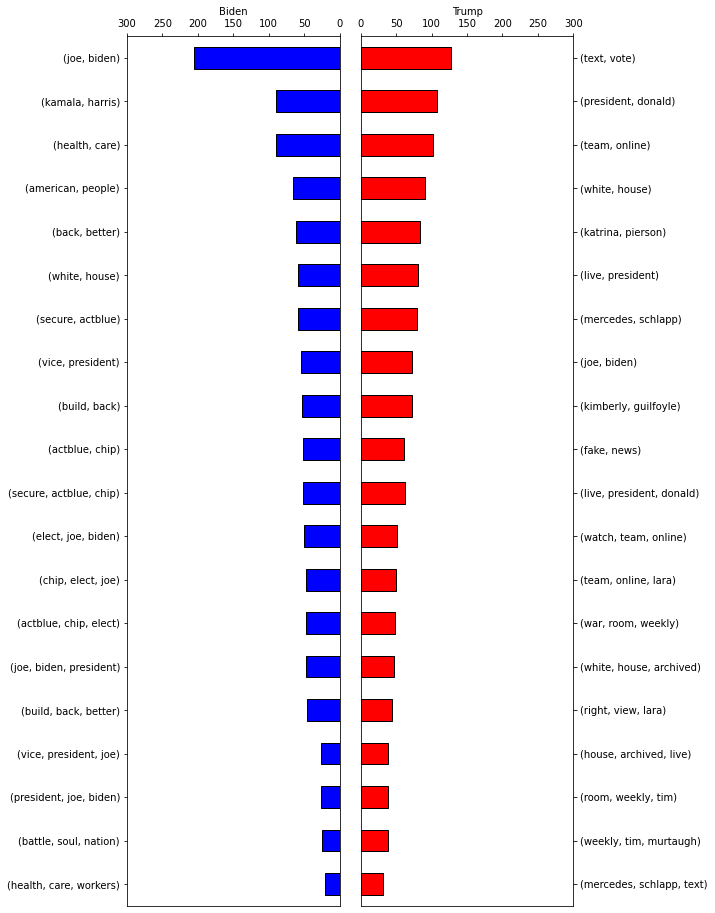

In [28]:
barstyle = {"edgecolor":"black", "linewidth":1}
fig, ax=plt.subplots(1,2, figsize=(8,16), 
                     gridspec_kw={'width_ratios':[1,1], 'wspace':0.1, 'hspace':0.1})

barh_ax = ax[0]
biden_ngrams[::-1].plot.barh(ax=barh_ax, color='blue',**barstyle)
barh_ax.yaxis.set_label_position("left")
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("top")
barh_ax.set_xlim([0, 300])
barh_ax.set_xlim(barh_ax.get_xlim()[::-1])
barh_ax.set_xlabel('Biden')
barh_ax.set_ylabel('')

barh_ax = ax[1]
trump_ngrams[::-1].plot.barh(ax=barh_ax, color='red',**barstyle)
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("top")
barh_ax.set_xlim([0, 300])
barh_ax.set_xlim(barh_ax.get_xlim())
barh_ax.yaxis.tick_right()
barh_ax.set_xlabel('Trump')
barh_ax.set_ylabel('')
plt.show()

## GENSIM MODELS 

In [29]:
import gensim
from gensim import corpora

In [30]:
NUM_TOPICS = 5

In [31]:
dictionary_trump = corpora.Dictionary(trump_df.postNew)
corpus_trump = [dictionary_trump.doc2bow(text) for text in trump_df.postNew]
trump_model = gensim.models.ldamulticore.LdaModel(corpus_trump, num_topics=NUM_TOPICS, id2word=dictionary_trump, passes=15)
# trump_model.save('trump_model.gensim')

In [32]:
topics_trump = trump_model.print_topics(num_words=4)
for topic in topics_trump:
    print(topic)

(0, '0.012*"biden" + 0.012*"news" + 0.011*"fake" + 0.010*"joe"')
(1, '0.019*"vote" + 0.019*"great" + 0.009*"georgia" + 0.009*"america"')
(2, '0.068*"text" + 0.043*"watch" + 0.034*"president" + 0.029*"team"')
(3, '0.013*"right" + 0.009*"view" + 0.009*"lara" + 0.007*"guilfoyle"')
(4, '0.013*"president" + 0.013*"great" + 0.013*"white" + 0.012*"house"')


In [33]:
dictionary_biden = corpora.Dictionary(biden_df.postNew)
corpus_biden = [dictionary_biden.doc2bow(text) for text in biden_df.postNew]
biden_model = gensim.models.ldamulticore.LdaModel(corpus_biden, num_topics=NUM_TOPICS, id2word=dictionary_biden, passes=15)

In [34]:
topics_biden = biden_model.print_topics(num_words=4)
for topic in topics_biden:
    print(topic)

(0, '0.015*"president" + 0.011*"get" + 0.010*"back" + 0.008*"covid"')
(1, '0.024*"president" + 0.015*"need" + 0.011*"donald" + 0.008*"biden"')
(2, '0.021*"vote" + 0.015*"make" + 0.013*"care" + 0.013*"health"')
(3, '0.016*"biden" + 0.014*"chip" + 0.011*"joe" + 0.011*"help"')
(4, '0.011*"president" + 0.010*"one" + 0.008*"nation" + 0.008*"american"')


## Sentiment

In [35]:
def sentiment_analysis(df):
    
    df['Polarity'] = df['text'].apply(lambda x: TextBlob(' '.join(x)).sentiment.polarity)
    df['Subjectivity'] = df['text'].apply(lambda x: TextBlob(' '.join(x)).sentiment.subjectivity)

    df.loc[df.Polarity > 0,'Sentiment'] = 'positive'
    df.loc[df.Polarity == 0,'Sentiment'] = 'neutral'
    df.loc[df.Polarity < 0,'Sentiment'] = 'negative'
    
    return df[['datetime','text','likes','postNew','Polarity','Subjectivity','Sentiment']]

In [36]:
trump_sentiment = sentiment_analysis(trump_df)
trump_sentiment.head(3)

,datetime,text,likes,postNew,Polarity,Subjectivity,Sentiment
0,2020-12-31 20:28:30,"The Trump White House Archived\r\nDecember 31,...",207708,"[white, house, archived, december, happy, new,...",0.00,0.0,neutral
1,2020-12-31 02:26:20,Donald Trump Jr. tagged a product from their s...,58766,"[donald, tagged, product, shop, december, guys...",0.00,0.0,neutral
2,2020-12-31 02:15:06,"THEBLAZE.COM\r\nLevin: On January 6, we learn ...",177967,"[levin, january, learn, whether, constitution,...",0.05,1.0,positive


In [37]:
biden_sentiment = sentiment_analysis(biden_df)
biden_sentiment.head(3)

,datetime,text,likes,postNew,Polarity,Subjectivity,Sentiment
0,2020-12-31 22:50:38,We have less than one week to do everything in...,16095,"[less, one, week, everything, power, help, jon...",-0.3125,1.0,negative
1,2020-12-31 20:02:44,Georgia — Today is your last chance to vote ea...,21176,"[georgia, today, last, chance, vote, early, ah...",-0.2500,1.0,negative
2,2020-12-31 02:29:10,The next few weeks and months are going to be ...,53949,"[next, weeks, months, going, tough, period, na...",0.0000,0.0,neutral


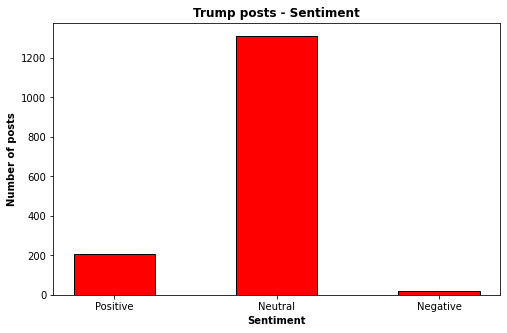

In [38]:
# sentiment - Trump 
df_trump_positive = len(trump_sentiment.loc[trump_sentiment.Sentiment=='positive'])
df_trump_neutral = len(trump_sentiment.loc[trump_sentiment.Sentiment=='neutral'])
df_trump_negative = len(trump_sentiment.loc[trump_sentiment.Sentiment=='negative'])

data_t = {'Positive':df_trump_positive,'Neutral':df_trump_neutral,'Negative':df_trump_negative}
sentiment_t = list(data_t.keys()) 
num_posts_t = list(data_t.values()) 

plt.figure(figsize = (8, 5)) 

plt.bar(sentiment_t, num_posts_t, color ='red', width = 0.5, edgecolor='black',) 

plt.xlabel("Sentiment", fontweight ='bold') 
plt.ylabel("Number of posts", fontweight ='bold') 
plt.title("Trump posts - Sentiment", fontweight ='bold') 
plt.show() 

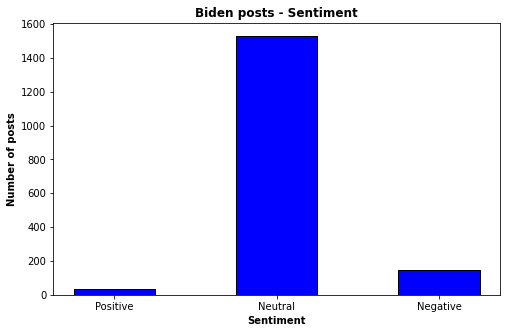

In [39]:
# sentiment - Biden
df_biden_positive = len(biden_sentiment.loc[biden_sentiment.Sentiment=='positive'])
df_biden_neutral = len(biden_sentiment.loc[biden_sentiment.Sentiment=='neutral'])
df_biden_negative = len(biden_sentiment.loc[biden_sentiment.Sentiment=='negative'])

data_b = {'Positive':df_biden_positive,'Neutral':df_biden_neutral,'Negative':df_biden_negative}
sentiment_b = list(data_b.keys()) 
num_posts_b = list(data_b.values()) 

plt.figure(figsize = (8, 5)) 

plt.bar(sentiment_b, num_posts_b, color ='blue', width = 0.5, edgecolor='black',) 

plt.xlabel("Sentiment", fontweight ='bold') 
plt.ylabel("Number of posts", fontweight ='bold') 
plt.title("Biden posts - Sentiment", fontweight ='bold') 
plt.show() 

## Wordcloud

In [40]:
def get_all_posts(df):
    words = ' '.join(df.apply(lambda x: ' '.join(x)))
    return words

In [41]:
# Create word strings
trump_negative = get_all_posts(trump_df.postNew[trump_df.Sentiment=='negative'])
biden_negative = get_all_posts(biden_df.postNew[biden_df.Sentiment=='negative'])
trump_positive = get_all_posts(trump_df.postNew[trump_df.Sentiment=='positive'])
biden_positive = get_all_posts(biden_df.postNew[biden_df.Sentiment=='positive'])

## Donald Trump

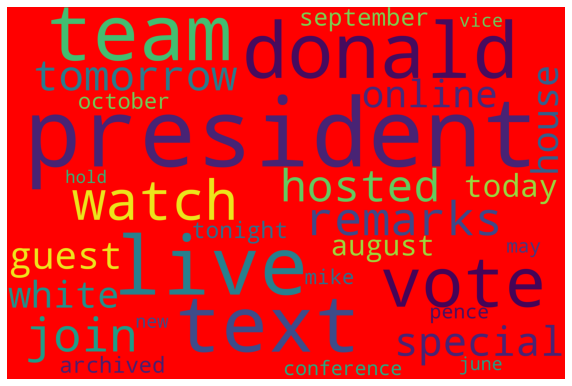

In [42]:
# positive posts
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='red', collocations=False, max_words=30,stopwords = stop_words).generate(trump_positive)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()

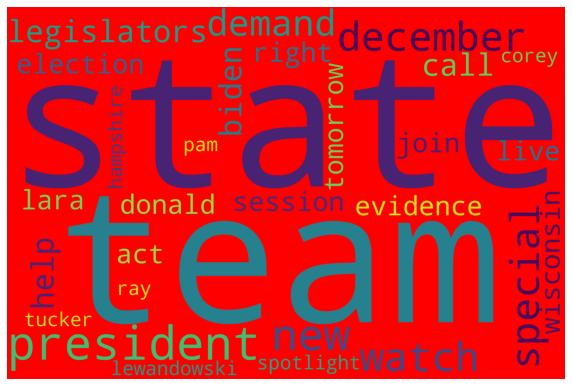

In [43]:
# negative posts
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='red', collocations=False, max_words=30, stopwords = stop_words).generate(trump_negative)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()

## Joe Biden

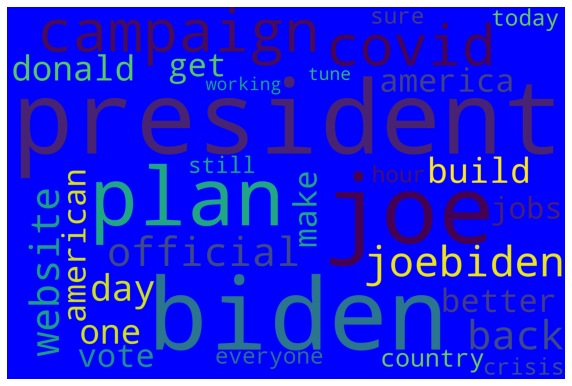

In [46]:
# positive posts
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='blue', collocations=False,max_words=30, stopwords = stop_words).generate(biden_positive)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()

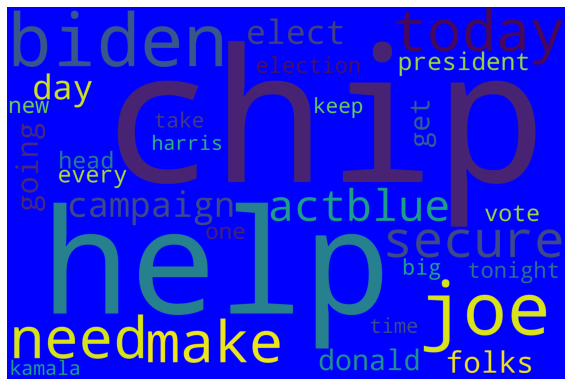

In [47]:
# negative posts
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='blue', collocations=False,max_words=30, stopwords = stop_words).generate(biden_negative)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()